In [1]:
# 3rd party # remove imports that are not needed
import numpy as np
import pandas as pd
import pylab as plt
import h5py
import matplotlib
%matplotlib inline
from astropy.utils.data import download_file  #import file from URL
from matplotlib.ticker import NullFormatter
import astropy.table

dataclecio = astropy.table.Table.read('/data/des90.a/data/jsanch87/DELVE_w_photozs_06416.fits')

In [2]:
dataclecio = dataclecio[dataclecio['extended_class']>1]

In [5]:
dataclecio

RA,DEC,FLAGS_G,FLAGS_R,FLAGS_I,FLAGS_Z,z,zerr,extended_class,flag_nband,flag_sn10,flag_color_cut,training,zspec,ID,CHI_SQ,M_0,ODDS,T_B,T_ML,Z_B,Z_B_MAX,Z_B_MIN,Z_ML
float64,float64,int16,int16,int16,int16,float64,float64,int64,int16,int16,int16,int16,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32
226.19222455923003,-2.2600542774630696,0,0,99,0,99.0,99.0,3,3,0,1,0,99.0,10641600005271,57.76758,20.55278,0.25712186,1.0,1.0,0.415,0.685,0.205,0.005
226.19305933488468,-2.2756274711278763,0,0,0,0,0.7781897783279419,0.0650557139068842,3,4,3,0,0,99.0,10641600005274,4.5950403,18.733782,1.0,1.0,1.0,0.815,0.9052463,0.7247537,0.815
226.2047462108713,-2.2508000088737106,0,0,0,0,0.8249779939651489,0.07465618558228015,3,4,2,0,0,99.0,10641600005276,0.12595512,21.122446,0.5366475,6.0,4.0,0.965,1.165,0.86729527,1.105
226.21502231992628,-2.226907227074747,0,0,0,0,0.7711434960365295,0.05990347392857076,2,4,4,0,0,99.0,10641600005281,2.9629862,18.952757,0.9895324,1.0,1.0,0.635,0.7162963,0.5537037,0.635
226.23074258523187,-2.239172180646051,0,0,0,0,0.19673851877450943,0.02148736329004168,3,4,4,0,0,99.0,10641600005284,0.75149447,19.179844,0.9895073,2.0,2.0,0.095,0.14944614,0.040553864,0.095
226.23406532260748,-2.252654755613193,0,0,0,0,0.3420431613922119,0.03557408569008111,3,4,4,0,0,99.0,10641600005286,0.764873,20.598305,0.8313447,3.0,3.0,0.125,0.195,0.06906219,0.125
226.25504761410187,-2.238905836483397,0,0,0,0,0.5843139588832855,0.030563173577189406,3,4,4,0,0,99.0,10641600005293,0.21097168,20.487204,0.5190631,2.0,1.0,0.405,0.475,0.215,0.215
226.26288208374598,-2.178529819932578,0,0,0,0,0.33469144999980927,0.016127261519432085,3,4,4,0,0,99.0,10641600005295,2.1470988,18.939308,1.0,2.0,2.0,0.355,0.42237398,0.287626,0.355
226.26611901106395,-2.2338507481306067,2,2,2,1,0.23499781638383865,0.014679739616811294,3,4,4,0,0,99.0,10641600005296,3.2134807,18.221272,0.9963588,1.0,1.0,0.205,0.26491562,0.14508438,0.205


In [4]:
z_bpz, z_nn = dataclecio['Z_B'], dataclecio['z']

## Histograms

(array([  7.,  12.,  13.,  37.,  39.,  66., 139.,  78.,  49.,  58.,  92.,
         80.,  83., 734., 157.,  61.,  69.,  73.,  97.,  98.,  77.,  47.,
         52.,  57.,  41.,  43.,  49.,  41.,  16.,  10.,  10.,  22.,   6.,
          6.,   3.,   9.,   4.,   4.,   0.]),
 array([0.        , 0.03076923, 0.06153846, 0.09230769, 0.12307692,
        0.15384616, 0.18461539, 0.21538462, 0.24615385, 0.2769231 ,
        0.30769232, 0.33846155, 0.36923078, 0.4       , 0.43076923,
        0.46153846, 0.4923077 , 0.52307695, 0.5538462 , 0.5846154 ,
        0.61538464, 0.64615387, 0.6769231 , 0.7076923 , 0.73846155,
        0.7692308 , 0.8       , 0.83076924, 0.86153847, 0.8923077 ,
        0.9230769 , 0.95384616, 0.9846154 , 1.0153847 , 1.0461539 ,
        1.0769231 , 1.1076924 , 1.1384616 , 1.1692308 , 1.2       ],
       dtype=float32),
 <BarContainer object of 39 artists>)

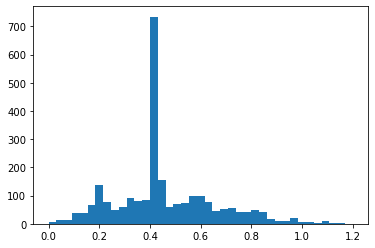

In [5]:
plt.hist(z_bpz, range=(0, 1.2), bins = 'auto')

(array([  0.,   5.,   5.,  24.,  33.,  40.,  45.,  51.,  76.,  39.,  39.,
         55., 101., 113., 195., 184., 151., 122., 128., 151., 161.,  60.,
          6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.        , 0.03870968, 0.07741935, 0.11612903, 0.15483871,
        0.19354839, 0.23225806, 0.27096774, 0.30967742, 0.3483871 ,
        0.38709677, 0.42580645, 0.46451613, 0.50322581, 0.54193548,
        0.58064516, 0.61935484, 0.65806452, 0.69677419, 0.73548387,
        0.77419355, 0.81290323, 0.8516129 , 0.89032258, 0.92903226,
        0.96774194, 1.00645161, 1.04516129, 1.08387097, 1.12258065,
        1.16129032, 1.2       ]),
 <BarContainer object of 31 artists>)

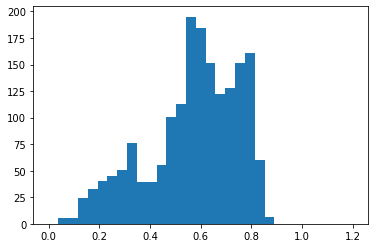

In [7]:
plt.hist(z_nn, range=(0, 1.2), bins = 'auto')

## Ploting residuals

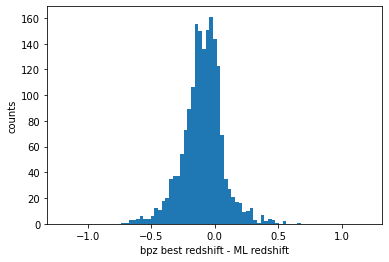

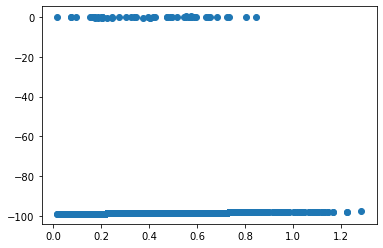

In [22]:
plt.hist(z_bpz-z_nn, range=(-1.2, 1.2), bins = 'auto')
plt.xlabel('bpz best redshift - ML redshift')
plt.ylabel('counts')
plt.show()



plt.scatter(z_bpz, z_bpz-z_spec)
plt.show()

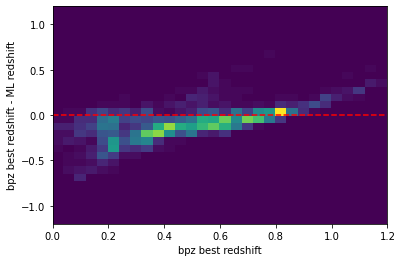

In [11]:
plt.hist2d(z_bpz, z_bpz-z_clecio, range=[(0, 1.2),(-1.2, 1.2)], bins=30)
plt.axhline(0.0, ls='--', c='r')
plt.xlabel('bpz best redshift')
plt.ylabel('bpz best redshift - ML redshift')
plt.show()

## Bias

In [12]:
z_spec = dataclecio['zspec']

In [13]:
z_err_NN = dataclecio['zerr']

**BPZ BIAS**

In [14]:
bias_bpz = z_bpz - z_spec
bias_clecio = z_clecio - z_spec
std_bpz = np.std(z_bpz, ddof = 1)

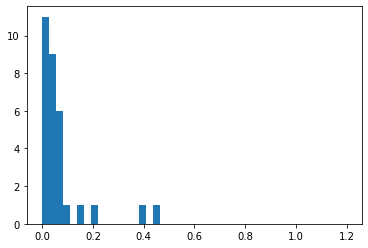

In [15]:
n, bins, patches = plt.hist(bias_bpz, range=(0, 1.2), bins = 'auto')

In [16]:
def compute_sigma68(zpred, ztrue):
    """Compute the rms error between zpred and ztrue                                                                                                                                                        
                                                                                                                                                                                                            
    Parameters                                                                                                                                                                                              
    ----------                                                                                                                                                                                              
    zpred : predicted redshift                                                                                                                                                                              
    ztrue : spectroscopic redshift                                                                                                                                                                          
                                                                                                                                                                                                            
    Returns                                                                                                                                                                                                 
    -------                                                                                                                                                                                                 
    rms_error : root-mean square error                                                                                                                                                                      
    """
    # This question asks for the rms error of the difference                                                                                                                                                
    # distribution.                                                                                                                                                                                         
    return np.std(ztrue - zpred)

In [18]:
z_err_bpz_68 = compute_sigma68(z_bpz, z_spec)

(-1.0, 1.0)

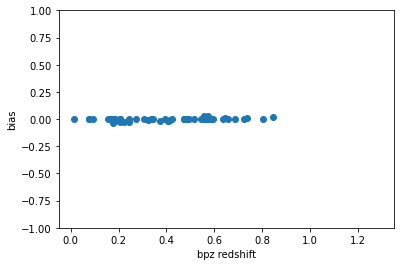

In [20]:
plt.scatter(z_bpz, bias_bpz/z_err_bpz_68)
plt.xlabel('bpz redshift')
plt.ylabel('bias')
plt.ylim(-1, 1)

In [56]:
bias_bpz_med = np.median(bias_bpz)
print('median bias =', bias_bpz_med)

median bias = -98.58500000834465
